In [17]:
import json
import math
import tikzplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, cm, colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Import data made with Julia \
This first part creates gif of growth process

In [2]:
json_data = open("data/n_10000.json")
data = json.load(json_data)
json_data.close()

growth = [data[key] for key in data]

In [3]:
def convert_to_patches(center, a, b, angle):
    return patches.Ellipse(self.center, 2*a, 2*b, angle=self.angle*180/math.pi)


In [4]:
Energy = [[sample['energy'] for sample in state] for state in growth]
coord_number = [[sample['coord'] for sample in state] for state in growth]

In [5]:
# let's have fun with colours --> map energy values to color palette
my_palette = LinearSegmentedColormap.from_list('custom red', ["#577590", "#f94144", "#f8961e"], N=256)
# my_palette = LinearSegmentedColormap.from_list('custom red', ["#ffffff", "#ff0a54"], N=256)

## heatmap of energy
minima = np.round(np.min(Energy), 2)
maxima = np.round(np.max(Energy), 2)

## heatmap of coordination number
# minima = np.round(np.min(coord_number), 2)
# maxima = np.round(np.max(coord_number), 2)

norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=my_palette)

In [6]:
grid = [1000,1000]
i = 1
for distribution in growth:
    plt.figure(figsize=(8,8))
    for sample in distribution:
        v = sample['energy']

        center, a, b, angle = sample['center'], 2*sample['a'], 2*sample['b'], sample['angle']*180/math.pi
        ellipse = patches.Ellipse(center, a, b, angle)

        plt.gca().add_patch(ellipse)
        ellipse.set_facecolor(mapper.to_rgba(v))
        ellipse.set_label('_nolegend_')

    cbar = np.round( np.linspace(minima, maxima, 5, endpoint=True), 2)
    plt.colorbar(mapper, ticks=cbar, shrink=0.85, orientation='vertical')

    plt.axis('scaled')
    plt.xlim(0.0, grid[0])
    plt.ylim(0.0, grid[1])

    output_name = "../figures/gifs/N_1024/" + f"pic{i:02d}.png"
    plt.savefig(output_name, bbox_inches='tight')
    plt.close()
    i += 1

/tmp/ipykernel_60698/3420546870.py:9: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = patches.Ellipse(center, a, b, angle)
/tmp/ipykernel_60698/3420546870.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, ticks=cbar, shrink=0.85, orientation='vertical')


___
Create graphs of distribution's parametres averaged over multiple runs

In [18]:
with np.load('data/run_e_2.npz') as data:
    coord_number = data['Z']
    coord_error = data['error_coord']
    energy = data['E']
    energy_error = data['error_energy']
    accepted = data['accepted_theta']
    accepted_error = data['error_accepted']
    rejected = data['rejected_theta']
    rejected_error = data['error_rejected']
    correlation = data['correlation']
    correlation_error = data['error_correlation']
    grid = data['grid']
    a_range = data['a_range']

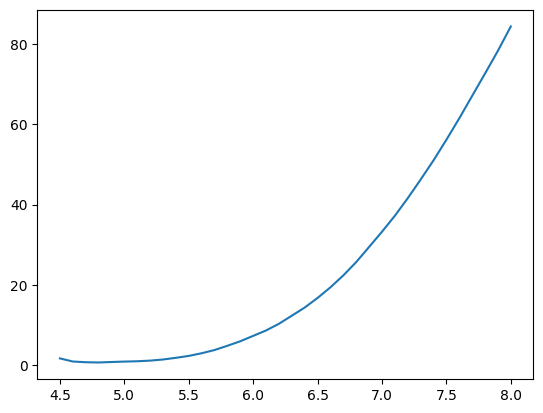

In [19]:
## check parametres
x = a_range
y = energy
plt.plot(x, y)
plt.show()

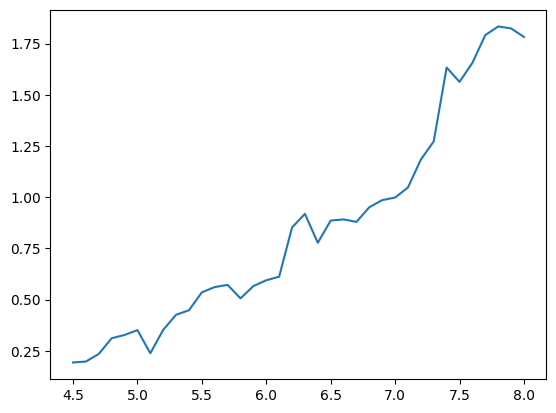

In [20]:
## check parametres
x = a_range
y = energy_error
plt.plot(x, y)
plt.show()

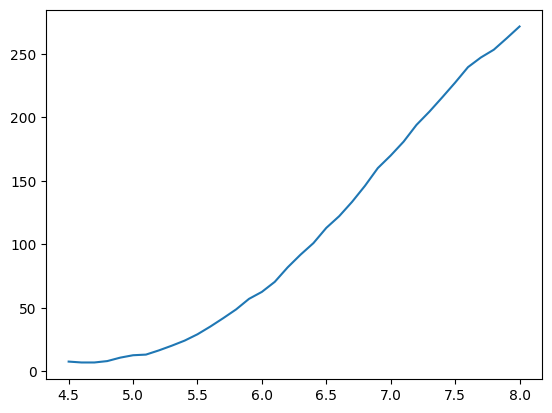

In [21]:
## Coordination numbers
x = a_range
y = coord_number

## Z for one ellipse
plt.plot(x, y)
plt.show()

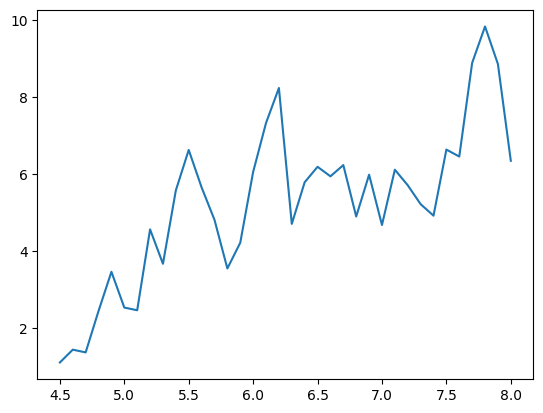

In [9]:
## check parametres
x = a_range
y = coord_error
plt.plot(x, y)
plt.show()

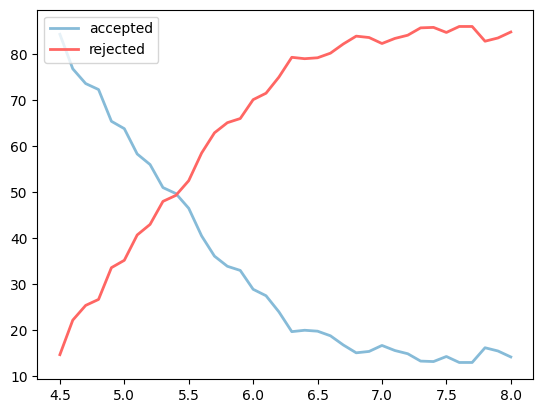

In [10]:
x = a_range
y = accepted
z = rejected

plt.plot(x, y, color='#86BBD8', linewidth=2, label='accepted')
plt.plot(x, z, color='#FF6663', linewidth=2, label='rejected')
plt.legend(loc='upper left')
plt.show()

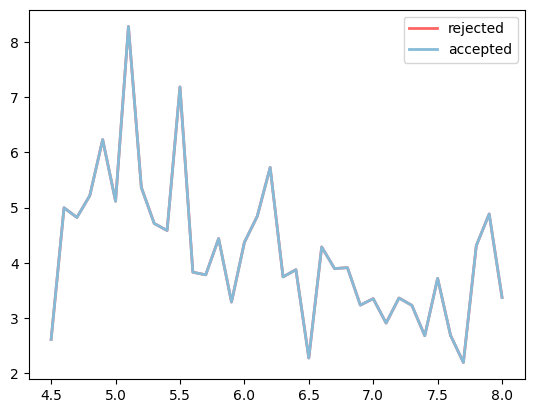

In [14]:
x = a_range
y = accepted_error
z = rejected_error

plt.plot(x, z, color='#FF6663', linewidth=2, label='rejected')
plt.plot(x, y, color='#86BBD8', linewidth=2, label='accepted')
plt.legend(loc='upper right')
plt.show()

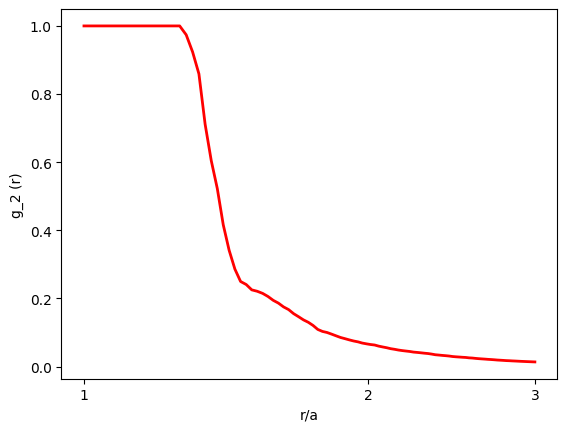

In [15]:
## Plot the correlation function
r = np.linspace(1,3, 100)
y = correlation
plt.plot(r, y, linewidth=2, color='r')

plt.xscale('log')
plt.xticks([1, 2, 3], [1, 2, 3])

plt.xlabel('r/a')
plt.ylabel('g_2 (r)')
plt.show()

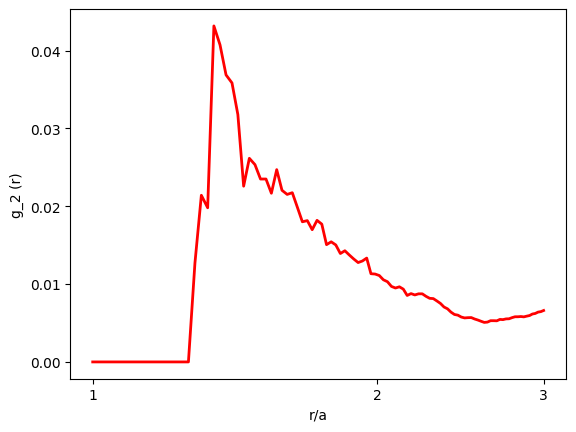

In [16]:
## Plot the correlation function
r = np.linspace(1,3, 100)
y = correlation_error
plt.plot(r, y, linewidth=2, color='r')

plt.xscale('log')
plt.xticks([1, 2, 3], [1, 2, 3])

plt.xlabel('r/a')
plt.ylabel('g_2 (r)')
plt.show()